In [1]:
# Proyecto sobre análisis de Customer Personality Analysis. Pequeño análisis sobre este Dataset.

# Librerías.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualización
from sklearn.linear_model import LinearRegression
import seaborn as sb # Visualización

In [239]:
# Carga y preparación de los datos.

raw_data = pd.read_excel("marketing_campaign.xlsx")
df = raw_data.copy()

In [240]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [241]:
# Para visualizar todas las columnas 

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [242]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [243]:
# Columnas contenidas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [244]:
# Hay datos nulos?

df.isnull().values.any() # Si los hay, True.

True

In [245]:
# Cuantos valores nulos hay?

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [246]:
# Elimino los 24 clientes con salario nulo.

df.dropna(inplace=True)

In [247]:
# Comprobación si se han eliminado los datos.

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
# Exploración de los datos.

Text(0.5, 1.0, 'Nº de clientes por estudios')

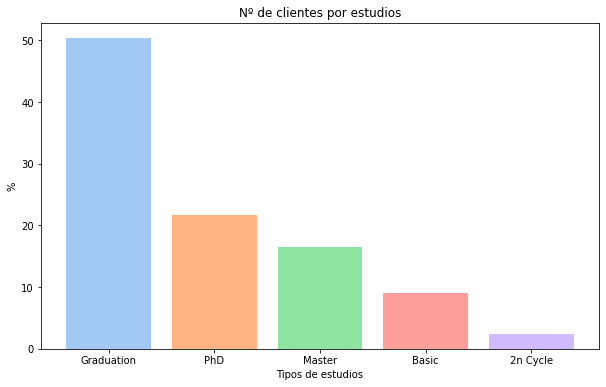

In [43]:
# Tipos de clientes por estudios

fig = plt.subplots(figsize=(10,6))

c = sb.color_palette('pastel')[0:5]

plt.bar(df["Education"].unique(),df["Education"].value_counts()*100/len(df), color = c)
plt.xlabel("Tipos de estudios")
plt.ylabel("%")
plt.title("Nº de clientes por estudios")

In [ ]:
# La mayoría son "Graduation".

Text(0.5, 1.0, 'Nº de clientes por estado civil')

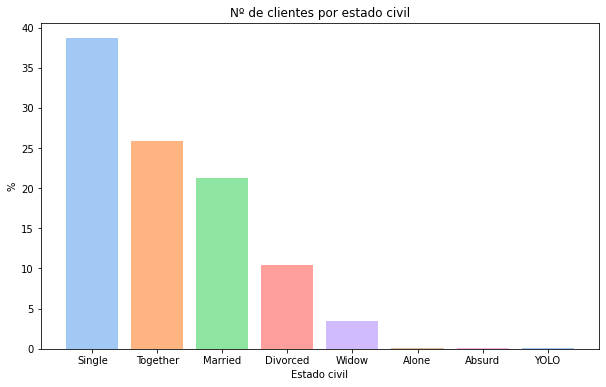

In [45]:
# Tipos de estado civil registrados. 

fig = plt.subplots(figsize=(10,6))

c = sb.color_palette('pastel')[0:7]

plt.bar(df["Marital_Status"].unique(),df["Marital_Status"].value_counts()*100/len(df), color = c)
plt.xlabel("Estado civil")
plt.ylabel("%")
plt.title("Nº de clientes por estado civil")

In [46]:
# La mayoría son Single.

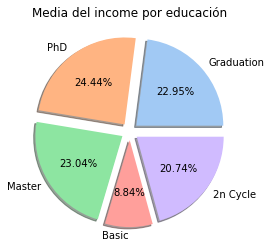

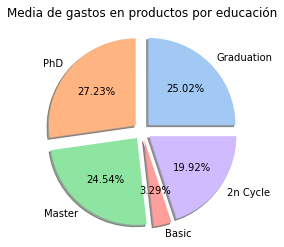

In [203]:
# Media de income por educación.

x = pd.DataFrame(index = ["Mean income"])

for i in df["Education"].values:
        x[i] = round(df["Income"][ (df["Education"] == i) ].mean(),2)

c = sb.color_palette('pastel')[0:5]

plt.pie(x.loc["Mean income"], labels = x.columns, colors = c, autopct = "%.2f%%", explode = (0.1,0.1,0.1,0.1,0.1), shadow = True)

plt.title("Media del income por educación")

plt.show()

# Media de gastos en productos por educación.

x = pd.DataFrame(index = ["Mean income"])

for i in df["Education"].values:
        x[i] = round(df["MntWines"][ (df["Education"] == i) ].mean(),2) + round(df["MntFruits"][ (df["Education"] == i) ].mean(),2) + round(df["MntMeatProducts"][ (df["Education"] == i) ].mean(),2) + round(df["MntFishProducts"][ (df["Education"] == i) ].mean(),2) + round(df["MntSweetProducts"][ (df["Education"] == i) ].mean(),2) + round(df["MntGoldProds"][ (df["Education"] == i) ].mean(),2)

c = sb.color_palette('pastel')[0:5]

plt.pie(x.loc["Mean income"], labels = x.columns, colors = c, autopct = "%.2f%%", explode = (0.1,0.1,0.1,0.1,0.1), shadow = True)

plt.title("Media de gastos en productos por educación")

plt.show()

In [190]:
# Como vemos, la media de income por educación es practicamente similar salvo en el caso de "Basic"
# Al igual, la media de gastos en similar salvo en "Basic".

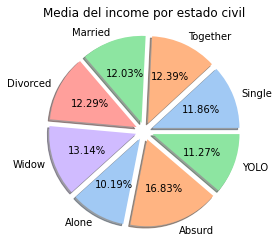

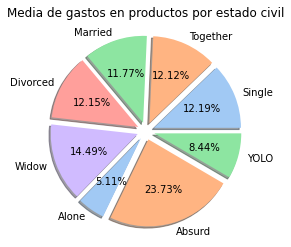

In [207]:
# Media de income por estado civil.

x = pd.DataFrame(index = ["Mean income"])

for i in df["Marital_Status"].values:
        x[i] = round(df["Income"][ (df["Marital_Status"] == i) ].mean(),2)

c = sb.color_palette('pastel')[0:5]

plt.pie(x.loc["Mean income"], labels = x.columns, colors = c, autopct = "%.2f%%", explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), shadow = True)

plt.title("Media del income por estado civil")

plt.show()

# Media de gastos en productos por estado civil.
    
x = pd.DataFrame(index = ["Mean income"])

for i in df["Marital_Status"].values:
        x[i] = round(df["MntWines"][ (df["Marital_Status"] == i) ].mean(),2) + round(df["MntFruits"][ (df["Marital_Status"] == i) ].mean(),2) + round(df["MntMeatProducts"][ (df["Marital_Status"] == i) ].mean(),2) + round(df["MntFishProducts"][ (df["Marital_Status"] == i) ].mean(),2) + round(df["MntSweetProducts"][ (df["Marital_Status"] == i) ].mean(),2) + round(df["MntGoldProds"][ (df["Marital_Status"] == i) ].mean(),2)

c = sb.color_palette('pastel')[0:5]

plt.pie(x.loc["Mean income"], labels = x.columns, colors = c, autopct = "%.2f%%", explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), shadow = True)

plt.title("Media de gastos en productos por estado civil")

plt.show()

In [208]:
# Como vemos, por estado civil, el income es parecido entre ambos. No se nota la diferencia de estudios "Basic".
# A su vez, la media de gastos está repartida salvo en el caso de "Alone" que, como es lógico, hará menos gastos al estar sólo.

In [12]:
# Ahora, se va a analizar el consumo de vino, para ver en que clientes nos podriamos enfocar.

# Primero, vamos a ver quienes son los clientes que están por encima de la media de dinero gastado en vino.

df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2216.000000   2216.000000  2216.000000         2216.0     2216.0   
mean       0.064079      0.013538     0.009477            3.0       11.0   
std        0.244950      0.115588     0.096907            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2216.000000  
mean      0.150271  
std       0.357417  
min       0.000000  
25%       0.000000  
50%   

In [13]:
# Busco los clientes con un valor superior a 305 en MntWines.

df[(df["MntWines"] >= 305)]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
2      4141        1965  Graduation       Together   71613.0        0   
5      7446        1967      Master       Together   62513.0        0   
15     2114        1946         PhD         Single   82800.0        0   
18     6565        1949      Master        Married   76995.0        0   
22     1993        1949         PhD        Married   58607.0        0   
23     4047        1954         PhD        Married   65324.0        0   
29     1966        1965         PhD        Married   84618.0        0   
34     8755        1946      Master        Married   68657.0        0   
36     4339        1970         PhD        Married   67353.0        0   
39     2968        1943         PhD       Divorced   48948.0        0   
40     8601        1980  Graduation        Married   80011.0        0   
49     6566        1954         PhD        Married   72550.0        1   
51     4114        1964      Master        Married   79143.0        0   
53     2225        1977  Graduation       Divorced   82582.0        0   
54     9381        1978  Graduation        Married   66373.0        1   
55     6260        1955      Master       Together   82384.0        0   
59     8375        1968         PhD        Married   55954.0        0   
60     6853        1982      Master         Single   75777.0        0   
61     3076        1975  Graduation       Together   66653.0        1   
62     1012        1952  Graduation         Single   61823.0        0   
63     6518        1951         PhD          Widow   67680.0        0   
64     4137        1948  Graduation       Together   70666.0        0   
67     9369        1979    2n Cycle         Single   88194.0        0   
69     1357        1970  Graduation       Together   74854.0        1   
70     1402        1954      Master        Married   66991.0        0   
73     8132        1975         PhD        Married   60631.0        1   
76     1859        1972      Master        Married   75251.0        0   
77     7503        1976  Graduation         Single   75825.0        0   
79     1618        1965  Graduation       Together   56046.0        0   
88     8504        1973  Graduation        Married   79593.0        0   
96     7247        1960  Graduation          Widow   47916.0        0   
102    4518        1979  Graduation       Together   85693.0        0   
103    9370        1945         PhD        Married   65846.0        0   
109   10991        1960      Master        Married   89058.0        0   
110    5077        1979  Graduation       Together   77298.0        0   
111    7431        1991         PhD         Single   68126.0        0   
112    3267        1963      Master       Together   57288.0        0   
113     999        1991  Graduation         Single   86037.0        0   
114    9215        1980         PhD        Married   43974.0        1   
116    1592        1970  Graduation        Married   90765.0        0   
120    9805        1953      Master       Together   56129.0        0   
124    7215        1983  Graduation         Single  101970.0        0   
126   11071        1984  Graduation         Single   79607.0        0   
129   11051        1956         PhD       Together   77376.0        1   
131     433        1958      Master          Alone   61331.0        1   
135    1685        1967         PhD       Together   62981.0        0   
140     821        1992      Master         Single   92859.0        0   
141   11084        1976      Master       Together   65104.0        0   
142    8690        1962  Graduation        Married   86111.0        0   
143    2937        1974         PhD         Single   68352.0        0   
145    9949        1976  Graduation        Married   59809.0        0   
151    7987        1969  Graduation        Married   65747.0        0   
154    7055        1952         PhD       Together   61010.0       

In [14]:
# Filtro el dataframe, para centrarnos en los clientes potenciales de consumo de vino.

df_w_m = df[(df["MntWines"] >= 305)]

In [15]:
# ¿Qué educación tienen los clientes que más consumen vino?

df_w_m["Education"].value_counts()

Graduation    414
PhD           239
Master        145
2n Cycle       59
Name: Education, dtype: int64

In [209]:
# Estudio "Graduation" son los mayores consumidores de vino por encima de la media con 414 personas.
# Lógico ya que es el tipo de cliente que más aparece.

In [212]:
# Pero, ¿Cúal es la media de consumo por educación?.

df_mean_w1 = df_w_m[ (df_w_m["Education"] == "Graduation") ].describe().iloc[:,6][1]
df_mean_w2 = df_w_m[ (df_w_m["Education"] == "PhD") ].describe().iloc[:,6][1]
df_mean_w3 = df_w_m[ (df_w_m["Education"] == "Master") ].describe().iloc[:,6][1]
df_mean_w4 = df_w_m[ (df_w_m["Education"] == "2n Cycle") ].describe().iloc[:,6][1]

dic = {"Educacion": ["Graduation","PhD", "Master", "2nd Cycle"], "Media gastada en vino": [df_mean_w1,df_mean_w2,df_mean_w3,df_mean_w4] }
df_w_m_e = pd.DataFrame(data = dic)
df_w_m_e.sort_values(by = "Media gastada en vino", ascending = False)

Educacion  Media gastada en vino
1         PhD             734.615063
2      Master             704.786207
0  Graduation             621.251208
3   2nd Cycle             553.322034

In [211]:
# Como se puede ver, los mayores consumidores por encima de la media son los "Graduation" pero los que más se gastan de media
# son los PhD y Master. 

# Por lo que los graduation se puede entender que comprarán vinos más barato o menos cantidad que los PhD y Master.

# Sería interesante enfocarnos en PhD y Master dependiendo del tipo de vino. 

# La gente con educación "basic" no consume vino por encima de la media. También son los que menos income, por eso es lógico que no aparezca.

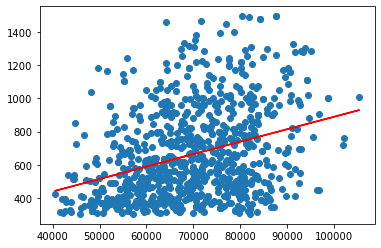

In [213]:
# ¿ Está relacionado el mayor gasto de vino con un mayor income en los clientes ?

# Aplico una regresión lineal para ver su relación.

X = df_w_m.iloc[:,4].values.reshape(-1,1)
Y = df_w_m.iloc[:,9].values.reshape(-1,1)
linear_r = LinearRegression()
linear_r.fit(X,Y)
Y_pred = linear_r.predict(X)

plt.scatter(X,Y)
plt.plot(X,Y_pred,color = "red")
plt.show()

In [214]:
# Se puede ver que hay una pequeña correlación entre el income y el gasto de vino de la gente. 
# Es lógico ya que los mayores consumidores de vino (PhD y Master) son los que mayor income de media poseen.

In [215]:
# ¿En qué plataforma hay más interés en comprar vino? Basado en los clientes que gastan más en vino que la media.

dic2 = {"Lugar de compra": ["Web","Catalogo","Tienda"], "Cantidad de compras": [df_w_m.iloc[:,16].sum(),df_w_m.iloc[:,17].sum(),df_w_m.iloc[:,18].sum()]}

df_w_m_c = pd.DataFrame(data = dic2)

df_w_m_c

Lugar de compra  Cantidad de compras
0             Web                 5176
1        Catalogo                 4252
2          Tienda                 7246

In [216]:
# Como podemos ver, donde más prioriza la compra de vino es en la tienda con 7246 ventas.
# Es algo a tener en cuenta.

In [217]:
# La edad media de los compradores de vino es:
df_w_m.describe()

ID   Year_Birth         Income     Kidhome    Teenhome  \
count    857.000000   857.000000     857.000000  857.000000  857.000000   
mean    5549.400233  1966.466744   69748.889148    0.108518    0.525088   
std     3200.634918    12.201257   11850.466660    0.322280    0.557144   
min        1.000000  1899.000000   40464.000000    0.000000    0.000000   
25%     2882.000000  1957.000000   61467.000000    0.000000    0.000000   
50%     5407.000000  1966.000000   69759.000000    0.000000    0.000000   
75%     8439.000000  1975.000000   78579.000000    0.000000    1.000000   
max    11176.000000  1995.000000  105471.000000    2.000000    2.000000   

          Recency     MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  857.000000   857.000000  857.000000       857.000000       857.000000   
mean    49.693116   662.323221   46.082847       321.558926        66.596266   
std     29.008666   271.879830   46.388762       240.004632        63.462664   
min      0.000000   305.000000    0.000000        15.000000         0.000000   
25%     25.000000   443.000000   11.000000       125.000000        16.000000   
50%     52.000000   595.000000   29.000000       253.000000        45.000000   
75%     73.000000   833.000000   70.000000       455.000000       104.000000   
max     99.000000  1493.000000  197.000000       984.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count        857.000000    857.000000         857.000000       857.000000   
mean          48.842474     69.515753           2.367561         6.039673   
std           48.681083     57.755265           2.130447         2.382435   
min            0.000000      0.000000           0.000000         1.000000   
25%           11.000000     27.000000           1.000000         4.000000   
50%           32.000000     48.000000           1.000000         6.000000   
75%           75.000000    100.000000           3.000000         8.000000   
max          198.000000    249.000000          15.000000        11.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count           857.000000         857.000000         857.000000   
mean              4.961494           8.455076           4.241540   
std               2.475990           2.745115           2.270545   
min               1.000000           3.000000           0.000000   
25%               3.000000           6.000000           2.000000   
50%               5.000000           8.000000           4.000000   
75%               6.000000          11.000000           6.000000   
max              11.000000          13.000000           9.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count    857.000000    857.000000    857.000000    857.000000    857.000000   
mean       0.089848      0.161027      0.177363      0.148191      0.028005   
std        0.286131      0.367770      0.382199      0.355497      0.165082   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Complain  Z_CostContact  Z_Revenue    Response  
count  857.000000          857.0      857.0  857.000000  
mean     0.005834            3.0       11.0    0.220537  
std      0.076204            0.0        0.0    0.414851  
min      0.000000            3.0       11.0    0.000000  
25%      0.000000            3.0       11.0    0.000000  
50%      0.000000            3.0       11.0    0.000000  
75%      0.000000            3.0       11.0    0.000000  
max      1.000000            3.0       11.0    1.000000

In [218]:
# En torno a los 1966 años.

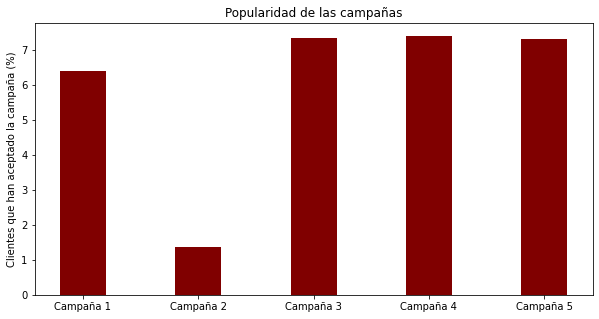

In [54]:
# Ahora, vamos a ver como han funcionado las campañas realizadas.

# Primero, vamos a ver la aceptación de las campañas por parte de los clientes. 

dic3 = {"Clientes que han aceptado la campaña": [df["AcceptedCmp1"].sum(),df["AcceptedCmp2"].sum(),df["AcceptedCmp3"].sum(),df["AcceptedCmp4"].sum(),df["AcceptedCmp5"].sum()],
        "% Aceptados respecto a los clientes totales" : [df["AcceptedCmp1"].sum()*100/len(df),df["AcceptedCmp2"].sum()*100/len(df),df["AcceptedCmp3"].sum()*100/len(df),df["AcceptedCmp4"].sum()*100/len(df),df["AcceptedCmp5"].sum()*100/len(df)]
       }

df_camp = pd.DataFrame(data = dic3, index = ["Campaña 1","Campaña 2","Campaña 3","Campaña 4","Campaña 5"])

clientes = ["Campaña 1","Campaña 2","Campaña 3","Campaña 4","Campaña 5"]
valores = list(dic3.values())[1]

# Gráfico de barras.

fig = plt.figure(figsize = (10, 5))
 
plt.bar(clientes, valores, color ='maroon', width = 0.4, align = "center")
 
#plt.xlabel("Campañas")
plt.ylabel("Clientes que han aceptado la campaña (%)")
plt.title("Popularidad de las campañas")
plt.show()

In [220]:
# Se puede ver que la campaña 2 no funciono, por lo que no se debería repetir.

# Entre todos los clientes, la campaña siempre suele tener entorno a un 7% de aceptación. 
# Se podría ver que mejorar para tener una mayor aceptación de las ofertas.

In [1]:
# Ahora vamos a ver las campañas aceptadas según la educación de los clientes.

dic4 = ["AcceptedCmp5","AcceptedCmp4","AcceptedCmp3","AcceptedCmp2","AcceptedCmp1"]

x = pd.DataFrame(index = df["Education"].unique())

# Array para guardar datos extraídos.
row = np.array([0,0,0,0,0])

for i in dic4:
    
    k = 0
    h = 0
    
    for j in df["Education"].unique():
        row[k] = df[i][ (df["Education"] == j) ].sum()*100/sum(df["Education"] == j)
        k += 1
        
    x.insert(h,i,row)
    
    h += 1

# Gráfico

ax = x.plot.bar(rot = 0, figsize = (7,7), title = "Campañas aceptadas por educación",ylabel = "Porcentaje de clientes según su estudio (%)")

NameError: name 'pd' is not defined

In [255]:
# Como vemos de nuevo, la campaña 2 no ha funcionado.
# Se puede destacar que la campaña 3 ha funcionado en más del 10% de basics. Por lo que puede ser interesante para este grupo.
# También podemos ver como la campaña 4 ha funcionado mejor en "PhD" y "Master".
# Las campañas han sido más aceptadas por los "PhD" y "Master", seguido por los "Graduation"

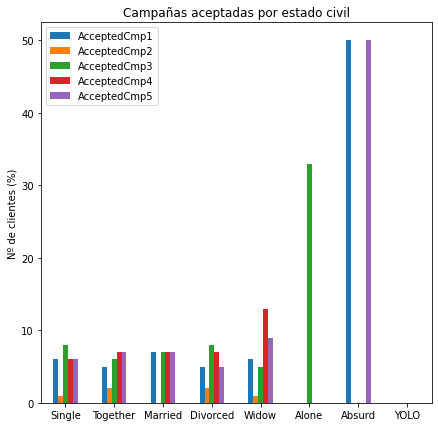

In [254]:
# Ahora vamos a ver las campañas aceptadas según el estado civil de los clientes.

dic4 = ["AcceptedCmp5","AcceptedCmp4","AcceptedCmp3","AcceptedCmp2","AcceptedCmp1"]

x = pd.DataFrame(index = df["Marital_Status"].unique())

# Array para guardar datos extraídos.
row = np.array([0,0,0,0,0,0,0,0])

for i in dic4:
    
    k = 0
    h = 0
    
    for j in df["Marital_Status"].unique():
        row[k] = df[i][ (df["Marital_Status"] == j) ].sum()*100/sum(df["Marital_Status"] == j)
        k += 1
        
    x.insert(h,i,row)
    
    h += 1

# Gráfico

ax = x.plot.bar(rot = 0, figsize = (7,7), title = "Campañas aceptadas por estado civil",ylabel = "Porcentaje de clientes según su estado civil (%)")

In [256]:
# Si ignoramos los casos de "Alone" y "Absurd", en el resto de estados civiles, las campañas han sido aceptadas casi en igual porcentaje
# entre estados civiles, salvo el caso de la campaña 2.

In [257]:
# Ahora, dejando a un lado las campañas, vamos a ver el porcentaje de quejas por parte de los clientes.

print("El porcentaje de quejas con respecto al número de clientes (2216) que tenemos es: " + str(round(df["Complain"].sum()*100/len(df),3)) + "%")

El porcentaje de quejas con respecto al número de clientes (2216) que tenemos es: 0.948%


In [ ]:
# Buen resultado, menos del 1% de quejas en los últimos 2 años.

In [219]:
# Correlaciones.

# Para ver otras posibles correlaciones entre el consumo de vino y otras variables, podemos aplicar el coeficiente de pearson.

df_w_m.corr(method = "pearson")

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000202  0.051560 -0.059592  0.005501   
Year_Birth           0.000202    1.000000  0.102294  0.086926 -0.186293   
Income               0.051560    0.102294  1.000000 -0.163771 -0.473812   
Kidhome             -0.059592    0.086926 -0.163771  1.000000  0.098678   
Teenhome             0.005501   -0.186293 -0.473812  0.098678  1.000000   
Recency             -0.012143   -0.011127  0.005734 -0.032297  0.028269   
MntWines            -0.037741    0.013790  0.325569 -0.092543 -0.168447   
MntFruits            0.048957    0.106983  0.402248 -0.106874 -0.338341   
MntMeatProducts     -0.003279    0.142826  0.601603 -0.199470 -0.558426   
MntFishProducts     -0.017486    0.076122  0.402882 -0.111064 -0.372041   
MntSweetProducts     0.030752    0.124481  0.399362 -0.150662 -0.282559   
MntGoldProds        -0.010663    0.029238  0.028351 -0.049769 -0.025199   
NumDealsPurchases   -0.086180   -0.077301 -0.535708  0.510127  0.567493   
NumWebPurchases     -0.011153   -0.062327 -0.249612  0.093284  0.294967   
NumCatalogPurchases  0.002551    0.025886  0.402376 -0.245103 -0.347780   
NumStorePurchases   -0.023037    0.068780  0.066410 -0.028155 -0.012820   
NumWebVisitsMonth   -0.048540   -0.057586 -0.648613  0.329731  0.509122   
AcceptedCmp3        -0.082218    0.070960 -0.040832 -0.004509 -0.047133   
AcceptedCmp4        -0.030656   -0.002710  0.030026  0.010098  0.014470   
AcceptedCmp5        -0.014959    0.106733  0.480827 -0.090051 -0.333632   
AcceptedCmp1        -0.038027    0.072914  0.332557 -0.028365 -0.234078   
AcceptedCmp2        -0.035862    0.028302  0.018041 -0.057188 -0.033051   
Complain            -0.028633   -0.009214 -0.005614  0.021758 -0.017209   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.029566    0.067805  0.193960 -0.056882 -0.228667   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.012143 -0.037741   0.048957        -0.003279   
Year_Birth          -0.011127  0.013790   0.106983         0.142826   
Income               0.005734  0.325569   0.402248         0.601603   
Kidhome             -0.032297 -0.092543  -0.106874        -0.199470   
Teenhome             0.028269 -0.168447  -0.338341        -0.558426   
Recency              1.000000  0.011860   0.003616         0.045626   
MntWines             0.011860  1.000000   0.013319         0.183502   
MntFruits            0.003616  0.013319   1.000000         0.419767   
MntMeatProducts      0.045626  0.183502   0.419767         1.000000   
MntFishProducts      0.004903 -0.016510   0.405201         0.420520   
MntSweetProducts     0.033427 -0.017654   0.445439         0.389009   
MntGoldProds         0.014807  0.006392   0.159218         0.058710   
NumDealsPurchases   -0.023465 -0.142221  -0.301027        -0.431118   
NumWebPurchases     -0.022001 -0.014549  -0.120755        -0.256511   
NumCatalogPurchases  0.073629  0.213517   0.286078         0.432200   
NumStorePurchases    0.015340  0.047143   0.019785         0.006490   
NumWebVisitsMonth   -0.031420  0.060206  -0.339762        -0.518487   
AcceptedCmp3        -0.012578  0.082385   0.045822         0.018967   
AcceptedCmp4         0.006827  0.316136  -0.152183        -0.113480   
AcceptedCmp5        -0.018477  0.439667   0.112964         0.284131   
AcceptedCmp1        -0.046902  0.247647   0.113590         0.210270   
AcceptedCmp2        -0.001375  0.269323  -0.094579        -0.050049   
Complain             0.024592 -0.046497   0.002837         0.001610   
Z_CostContact             NaN       NaN        NaN              NaN   
Z_Revenue                 NaN       NaN        NaN              NaN   
Response            -0.190364  0.293978   0.078148         0.215284   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
ID         

<AxesSubplot:>

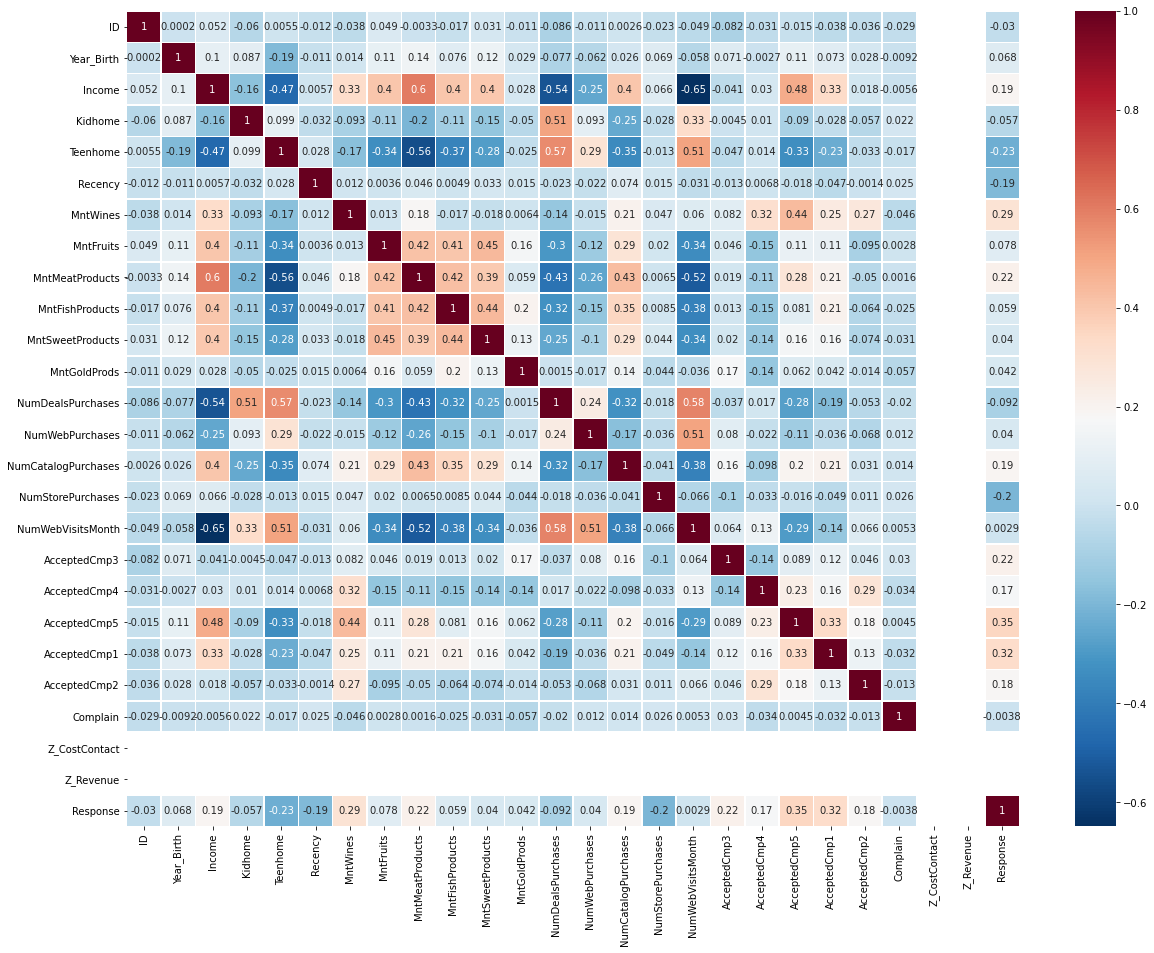

In [25]:
# Para ver las correlaciones en un mapa de calor con Seaborn.

# Aumento el tamaño.

fig, ax = plt.subplots(figsize=(20, 15))

# Mapa de calor.

sb.heatmap(df_w_m.corr(method = "pearson"), 
            xticklabels=df_w_m.corr(method = "pearson").columns,
            yticklabels=df_w_m.corr(method = "pearson").columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [258]:
# Observando los valores obtenidos:

# Se puede ver que hay una pequeña correlación entre el dinero gastado en vino y el income, como vimos en el caso anterior.
# Cuanto menos income más visitas mensuales a la web. Se entiende que será por la publicación de ofertas en ella.
# Cuanto más teenhome / kidhome más NumDealsPurchases. Esta relación es interesante, para analizar el número de clientes con niños y así priorizar ofertas hacia ellos.
# Cuanto más income más Gastado en carne.
# También vemos el número de visitas a la web afecta al número de ofertas compradas. 
# La compra de vino también tiene relación con la campaña nº5 y a su vez con el income.

# Esto nos da más indicios a lo comentado, que será el lugar donde vea las personas las ofertas y por ello los de mayor income no les interesa y tienen una correlación negativa.

In [31]:
# También sería interesante ver si hay alguna relación entre las variables y la educación y estado civil.

# Para ello, tendríamos que transformar estas dos columnas a datos numéricos:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [32]:
# Transformación de los valores a números para correlación.

df_num = df.copy()

for col_values in df_num.columns:
    if (df_num[col_values].dtype  == "object"):
        df_num[col_values] = df_num[col_values].astype("category")
        df_num[col_values] = df_num[col_values].cat.codes

df_num

ID  Year_Birth  Education  Marital_Status    Income  Kidhome  \
0      5524        1957          2               4   58138.0        0   
1      2174        1954          2               4   46344.0        1   
2      4141        1965          2               5   71613.0        0   
3      6182        1984          2               5   26646.0        1   
4      5324        1981          4               3   58293.0        1   
5      7446        1967          3               5   62513.0        0   
6       965        1971          2               2   55635.0        0   
7      6177        1985          4               3   33454.0        1   
8      4855        1974          4               5   30351.0        1   
9      5899        1950          4               5    5648.0        1   
11      387        1976          1               3    7500.0        0   
12     2125        1959          2               2   63033.0        0   
13     8180        1952          3               2   59354.0        1   
14     2569        1987          2               3   17323.0        0   
15     2114        1946          4               4   82800.0        0   
16     9736        1980          2               3   41850.0        1   
17     4939        1946          2               5   37760.0        0   
18     6565        1949          3               3   76995.0        0   
19     2278        1985          0               4   33812.0        1   
20     9360        1982          2               3   37040.0        0   
21     5376        1979          2               3    2447.0        1   
22     1993        1949          4               3   58607.0        0   
23     4047        1954          4               3   65324.0        0   
24     1409        1951          2               5   40689.0        0   
25     7892        1969          2               4   18589.0        0   
26     2404        1976          2               3   53359.0        1   
28     9422        1989          2               3   38360.0        1   
29     1966        1965          4               3   84618.0        0   
30     6864        1989          3               2   10979.0        0   
31     3033        1963          3               5   38620.0        0   
32     5710        1970          2               5   40548.0        0   
33     7373        1952          4               2   46610.0        0   
34     8755        1946          3               3   68657.0        0   
35    10738        1951          3               4   49389.0        1   
36     4339        1970          4               3   67353.0        0   
37    10755        1976          0               3   23718.0        1   
38     8595        1973          2               6   42429.0        0   
39     2968        1943          4               2   48948.0        0   
40     8601        1980          2               3   80011.0        0   
41      503        1985          3               3   20559.0        1   
42     8430        1957          2               5   21994.0        0   
44     2139        1975          3               3    7500.0        1   
45     1371        1976          2               4   79941.0        0   
46     9909        1996          0               3    7500.0        0   
47     7286        1968          2               5   41728.0        1   
49     6566        1954          4               3   72550.0        1   
50     8614        1957          2               6   65486.0        0   
51     4114        1964          3               3   79143.0        0   
52     1331        1977          2               4   35790.0        1   
53     2225        1977          2               2   82582.0        0   
54     9381        1978          2               3   66373.0        1   
55     6260        1955          3               5   82384.0        0   
56    10383        1966          2               2   70287.0        0   
57     7437        1988          2               4   27938.0       

In [33]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int8          
 3   Marital_Status       2216 non-null   int8          
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

<AxesSubplot:>

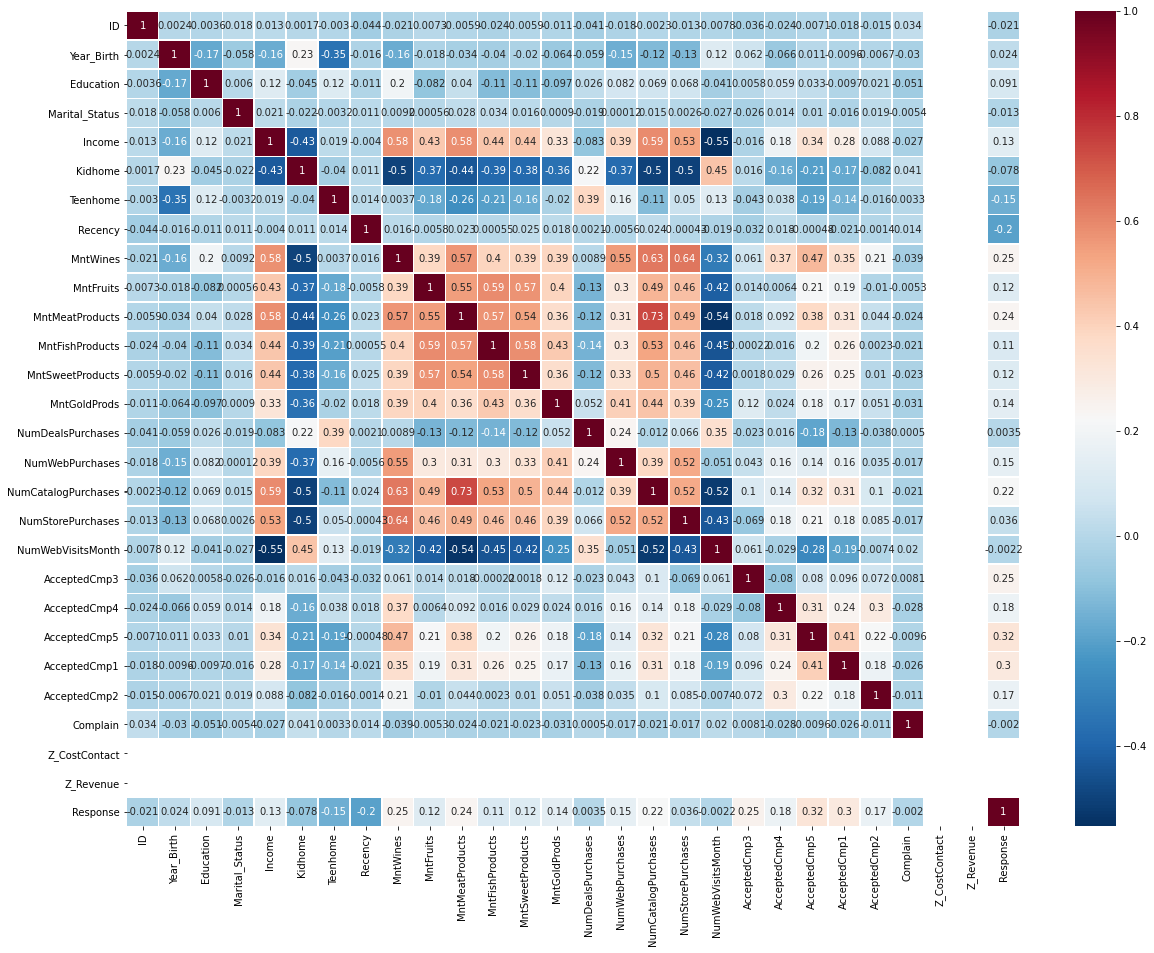

In [34]:
# Correlaciones incluyendo la educación y el estado civil.

fig = plt.subplots(figsize=(20,15))

sb.heatmap(df_num.corr(), 
           xticklabels = df_num.corr().columns,
           yticklabels = df_num.corr().columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.5)

In [35]:
# Como se puede ver, el estado civil y la educación no comparten ninguna relación con el resto de variables.

In [36]:
# Correlaciones más determinantes.

corr_matrix = df_num.corr()

corr_sorted = corr_matrix.unstack().sort_values()

high_corr = corr_sorted[ (corr_sorted >= 0.5) & (corr_sorted < 1)]

low_corr = corr_sorted[ (corr_sorted < -0.2)]

In [37]:
high_corr

NumWebPurchases      NumStorePurchases      0.516240
NumStorePurchases    NumWebPurchases        0.516240
NumCatalogPurchases  NumStorePurchases      0.517840
NumStorePurchases    NumCatalogPurchases    0.517840
Income               NumStorePurchases      0.529362
NumStorePurchases    Income                 0.529362
NumCatalogPurchases  MntFishProducts        0.532757
MntFishProducts      NumCatalogPurchases    0.532757
MntSweetProducts     MntMeatProducts        0.535136
MntMeatProducts      MntSweetProducts       0.535136
MntFruits            MntMeatProducts        0.547822
MntMeatProducts      MntFruits              0.547822
NumWebPurchases      MntWines               0.553786
MntWines             NumWebPurchases        0.553786
MntMeatProducts      MntWines               0.568860
MntWines             MntMeatProducts        0.568860
MntFruits            MntSweetProducts       0.571606
MntSweetProducts     MntFruits              0.571606
MntFishProducts      MntMeatProducts        0.

In [38]:
# La mayor correlación la tienen las compras en catálogo y la compra de carne (La gente prioriza la compra de carne a través de catálogo), 
# Seguido de la compra de vino en tienda (La gente prioriza la compra de vino en tienda).

In [39]:
low_corr

NumWebVisitsMonth    Income                -0.553088
Income               NumWebVisitsMonth     -0.553088
NumWebVisitsMonth    MntMeatProducts       -0.539484
MntMeatProducts      NumWebVisitsMonth     -0.539484
NumCatalogPurchases  NumWebVisitsMonth     -0.522004
NumWebVisitsMonth    NumCatalogPurchases   -0.522004
NumCatalogPurchases  Kidhome               -0.504501
Kidhome              NumCatalogPurchases   -0.504501
NumStorePurchases    Kidhome               -0.501349
Kidhome              NumStorePurchases     -0.501349
MntWines             Kidhome               -0.497336
Kidhome              MntWines              -0.497336
NumWebVisitsMonth    MntFishProducts       -0.446423
MntFishProducts      NumWebVisitsMonth     -0.446423
Kidhome              MntMeatProducts       -0.439261
MntMeatProducts      Kidhome               -0.439261
NumWebVisitsMonth    NumStorePurchases     -0.432398
NumStorePurchases    NumWebVisitsMonth     -0.432398
Kidhome              Income                -0.

In [40]:
# La correlación negativa mayor es el número de visitas en la web con el income (La gente con mayor income no visita la página).
# La compra de carne en relación con las visitas en la web (Conclusión: No promocionar la carne en web sino en tienda).